# Data Understanding and Exploration

In [ ]:
!pip install ipykernal

: 

In [ ]:
import pandas as pd

: 

In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [531]:
data = pd.read_csv('Cleaned_ML.csv')

In [532]:
data.head()

,Unnamed: 0,CustomerID,State,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,California,Los Angeles,33.964131,-118.272783,Male,No,No,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,1,9237-HQITU,California,Los Angeles,34.059281,-118.307420,Female,No,No,Yes,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,2,9305-CDSKC,California,Los Angeles,34.048013,-118.293953,Female,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,3,7892-POOKP,California,Los Angeles,34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,4,0280-XJGEX,California,Los Angeles,34.039224,-118.266293,Male,No,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices


In [533]:
data.tail()

,Unnamed: 0,CustomerID,State,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
7038,7038,2569-WGERO,California,Landers,34.341737,-116.539416,Female,No,No,No,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,NaN
7039,7039,6840-RESVB,California,Adelanto,34.667815,-117.536183,Male,No,Yes,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,NaN
7040,7040,2234-XADUH,California,Amboy,34.559882,-115.637164,Female,No,Yes,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,NaN
7041,7041,4801-JZAZL,California,Angelus Oaks,34.167800,-116.864330,Female,No,Yes,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,NaN
7042,7042,3186-AJIEK,California,Apple Valley,34.424926,-117.184503,Male,No,No,No,...,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0,38,5097,NaN


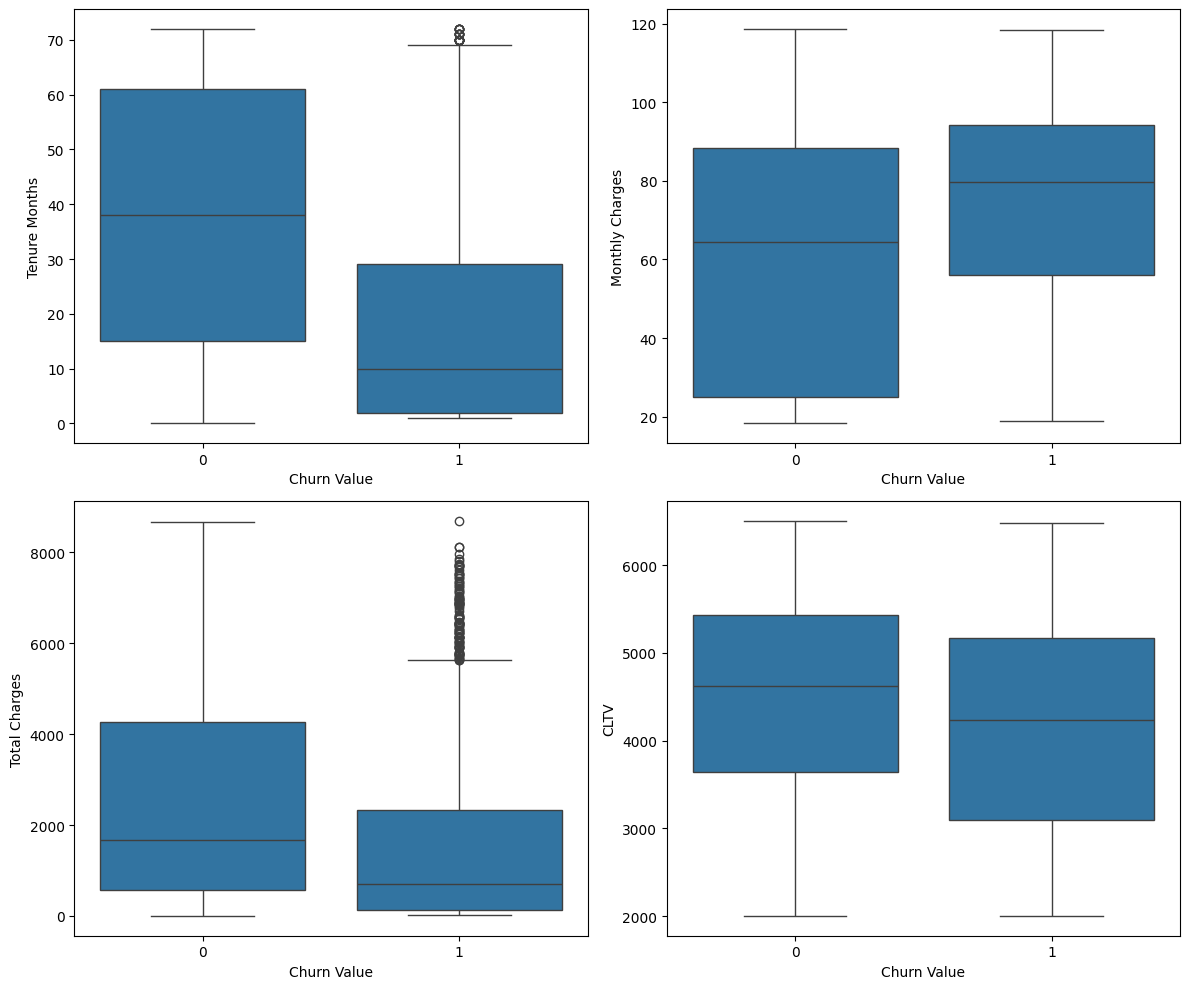

In [534]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=data, x='Churn Value', y='Tenure Months', ax=axes[0,0])
sns.boxplot(data=data, x='Churn Value', y='Monthly Charges', ax=axes[0,1])
sns.boxplot(data=data, x='Churn Value', y='Total Charges', ax=axes[1,0])
sns.boxplot(data=data, x='Churn Value', y='CLTV', ax=axes[1,1])
plt.tight_layout()
plt.show()

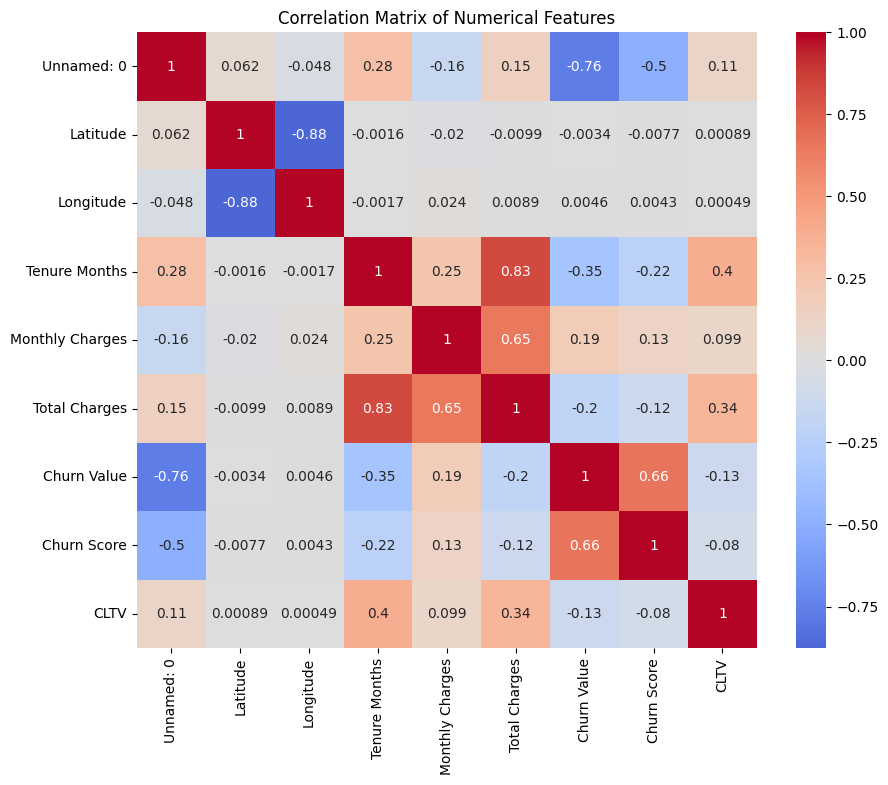

In [535]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

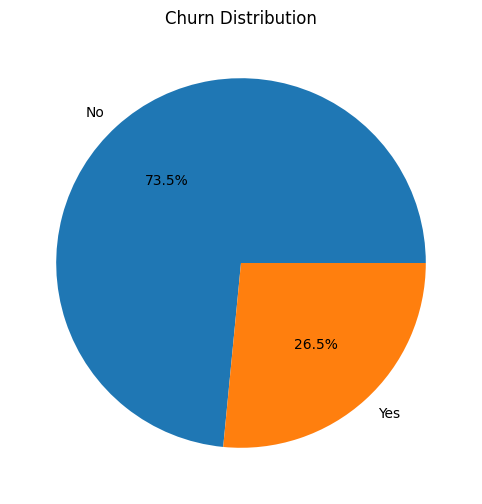

In [536]:
plt.figure(figsize=(8, 6))
plt.pie(data['Churn Value'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

In [537]:
print("Churn rate by Contract type:")
print(data.groupby('Contract')['Churn Value'].mean())

print("\nChurn rate by Internet Service:")
print(data.groupby('Internet Service')['Churn Value'].mean())

print("\nChurn rate by Payment Method:")
print(data.groupby('Payment Method')['Churn Value'].mean())

Churn rate by Contract type:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64

Churn rate by Internet Service:
Internet Service
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn Value, dtype: float64

Churn rate by Payment Method:
Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64


In [538]:
print("Churn rate by Contract + Internet Service:")
print(data.groupby(['Contract', 'Internet Service'])['Churn Value'].mean())

print("\nChurn rate by Payment Method + Contract:")
print(data.groupby(['Payment Method', 'Contract'])['Churn Value'].mean())

Churn rate by Contract + Internet Service:
Contract        Internet Service
Month-to-month  DSL                 0.322159
                Fiber optic         0.546053
                No                  0.188931
One year        DSL                 0.092982
                Fiber optic         0.192950
                No                  0.024725
Two year        DSL                 0.019108
                Fiber optic         0.072261
                No                  0.007837
Name: Churn Value, dtype: float64

Churn rate by Payment Method + Contract:
Payment Method             Contract      
Bank transfer (automatic)  Month-to-month    0.341256
                           One year          0.097187
                           Two year          0.033688
Credit card (automatic)    Month-to-month    0.327808
                           One year          0.103015
                           Two year          0.022375
Electronic check           Month-to-month    0.537297
                       

In [539]:
service_features = [
    'Online Security', 'Online Backup', 'Device Protection', 
    'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Phone Service', 'Multiple Lines', 'Paperless Billing'
]

In [540]:
for feature in service_features:
    print(f"Churn rates:")
    print(data.groupby(feature)['Churn Value'].mean())
    print("-" * 40)

Churn rates:
Online Security
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn Value, dtype: float64
----------------------------------------
Churn rates:
Online Backup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn Value, dtype: float64
----------------------------------------
Churn rates:
Device Protection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn Value, dtype: float64
----------------------------------------
Churn rates:
Tech Support
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn Value, dtype: float64
----------------------------------------
Churn rates:
Streaming TV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn Value, dtype: float64
----------------------------------------
Churn 

# Data Cleaning and Preparation

In [541]:
columns_to_drop = [
    'CustomerID',
    'Churn Score',
    'Churn Reason',
    'State',
    'City',
    'Latitude',
    'Longitude',
    data.columns[0]          
]

data = data.drop(columns=columns_to_drop, errors='ignore')

In [542]:
print(f"New shape: {data.shape}")
print(f"Columns Remained: {data.columns}")

New shape: (7043, 21)
Columns Remained: Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')


In [543]:
data.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
CLTV                 0
dtype: int64

In [544]:
data.dtypes

Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
CLTV                   int64
dtype: object

## Feature Engineering

In [545]:
def tenure_group(months):
    if months <= 12:
        return '0-12 months'
    elif months <= 24:
        return '13-24 months' 
    elif months <= 36:
        return '25-36 months'
    else:
        return '37+ months'

data['Tenure Group'] = data['Tenure Months'].apply(tenure_group)

In [546]:
data['Avg Monthly Charge'] = data.apply(
    lambda x: x['Total Charges'] / x['Tenure Months'] if x['Tenure Months'] > 0 else x['Monthly Charges'], 
    axis=1
)

In [547]:
data= data.drop('Tenure Months', axis = 1)
data= data.drop('Monthly Charges', axis = 1)

## Encoding 

In [548]:
data.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges', 'Churn Value', 'CLTV', 'Tenure Group',
       'Avg Monthly Charge'],
      dtype='object')

In [549]:
for col in data.columns:
    print(f"{col} : {data[col].unique()}")

Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Total Charges : [ 108.15  151.65  820.5  ... 7362.9   346.45 6844.5 ]
Churn Value : [1 0]
CLTV : [3239 2701 5372 ... 2770 4645 5553]
Tenure Group : ['0-12 months' '25-36 months' '37+ months' '13-24 months']
Avg Monthly Charge : [ 54.075       75.825      102.5625 

In [550]:
binary_columns = [
    'Gender', 'Partner', 'Dependents', 'Phone Service', 
    'Paperless Billing', 'Senior Citizen'  
]

In [551]:
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

In [552]:
for col in binary_columns:
    if col in data.columns and data[col].dtype == 'object':
        data[col] = data[col].map(binary_mapping)

In [553]:
data.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Value,CLTV,Tenure Group,Avg Monthly Charge
0,1,0,0,0,1,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,1,Mailed check,108.15,1,3239,0-12 months,54.075000
1,0,0,0,1,1,No,Fiber optic,No,No,No,...,No,No,Month-to-month,1,Electronic check,151.65,1,2701,0-12 months,75.825000
2,0,0,0,1,1,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,1,Electronic check,820.50,1,5372,0-12 months,102.562500
3,0,0,1,1,1,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,1,Electronic check,3046.05,1,5003,25-36 months,108.787500
4,1,0,0,1,1,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,Month-to-month,1,Bank transfer (automatic),5036.30,1,5340,37+ months,102.781633


In [554]:
for col in data.columns:
    if len(data[col].unique()) > 2:
        print(col, data[col].dtype)

Multiple Lines object
Internet Service object
Online Security object
Online Backup object
Device Protection object
Tech Support object
Streaming TV object
Streaming Movies object
Contract object
Payment Method object
Total Charges float64
CLTV int64
Tenure Group object
Avg Monthly Charge float64


In [555]:
multi_category_columns = [
    'Multiple Lines', 'Internet Service', 'Online Security', 
    'Online Backup', 'Device Protection', 'Tech Support',
    'Streaming TV', 'Streaming Movies', 'Contract', 
    'Payment Method', 'Tenure Group'
]

In [556]:
from sklearn.preprocessing import LabelEncoder

In [557]:
label_encoders = {}
for col in multi_category_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [558]:
# df_encoded = pd.get_dummies(data, columns=multi_category_columns, drop_first=True)

In [559]:
df_encoded = data.copy()

In [560]:
df_encoded.head(10)

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Value,CLTV,Tenure Group,Avg Monthly Charge
0,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,108.15,1,3239,0,54.075000
1,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,2,151.65,1,2701,0,75.825000
2,0,0,0,1,1,2,1,0,0,2,...,2,2,0,1,2,820.50,1,5372,0,102.562500
3,0,0,1,1,1,2,1,0,0,2,...,2,2,0,1,2,3046.05,1,5003,2,108.787500
4,1,0,0,1,1,2,1,0,2,2,...,2,2,0,1,0,5036.30,1,5340,3,102.781633
5,0,0,1,0,1,0,0,0,0,2,...,0,0,0,0,1,528.35,1,5925,0,52.835000
6,1,1,0,0,0,1,0,0,0,2,...,0,2,0,1,2,39.65,1,5433,0,39.650000
7,1,0,0,0,1,0,2,1,1,1,...,1,1,0,0,3,20.15,1,4832,0,20.150000
8,1,0,1,1,1,2,1,0,2,0,...,2,2,0,1,2,4749.15,1,5789,3,101.045745
9,1,0,1,0,0,1,0,0,2,0,...,0,0,0,0,2,30.20,1,2915,0,30.200000


In [561]:
service_cols = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']
data['Service_Count'] = data[service_cols].sum(axis=1)

## Train-Test Split

In [562]:
from sklearn.model_selection import train_test_split

In [563]:
X = df_encoded.drop('Churn Value', axis=1)
y = df_encoded['Churn Value']

In [564]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

In [565]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (5634, 20), (5634,)
Test set: (1409, 20), (1409,)


In [566]:
print(f"Original churn rate: {y.mean():.3f}")
print(f"Train churn rate: {y_train.mean():.3f}") 
print(f"Test churn rate: {y_test.mean():.3f}")

Original churn rate: 0.265
Train churn rate: 0.265
Test churn rate: 0.265


In [567]:
print(f"Training set class distribution:")
print(y_train.value_counts(normalize=True))
print(f"Test set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
Churn Value
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test set class distribution:
Churn Value
0    0.734564
1    0.265436
Name: proportion, dtype: float64


## Scaling

In [568]:
from sklearn.preprocessing import StandardScaler

In [569]:
numerical_columns = ['Total Charges', 'CLTV', 'Avg Monthly Charge']

In [570]:
scaler = StandardScaler()

In [571]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [572]:
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (5634, 20)
Test set shape: (1409, 20)


In [573]:
print(f"Scaled numerical features - Training set (first 5 rows):")
print(X_train_scaled[numerical_columns].head())

Scaled numerical features - Training set (first 5 rows):
      Total Charges      CLTV  Avg Monthly Charge
4626      -0.262257 -1.372236           -0.539986
4192      -0.503635  0.194486            0.391496
5457      -0.749883 -1.274104           -0.646102
4717      -0.172722 -0.683623            0.276552
4673      -0.989374 -0.842664           -0.674608


In [574]:
print(f"Scaled numerical features - Statistics:")
print(X_train_scaled[numerical_columns].mean())
print(X_train_scaled[numerical_columns].std())

Scaled numerical features - Statistics:
Total Charges         2.522338e-17
CLTV                  2.080929e-17
Avg Monthly Charge   -2.219658e-16
dtype: float64
Total Charges         1.000089
CLTV                  1.000089
Avg Monthly Charge    1.000089
dtype: float64


# Building Models

## Random Forest

In [575]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [576]:
rf_model = RandomForestClassifier(
    n_estimators=100,    
    random_state=42,     
    max_depth=10         
)

In [577]:
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [578]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [579]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8013
AUC-ROC: 0.8462


In [580]:
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)


In [581]:
print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))


Top 15 Most Important Features:
               feature  importance
16       Total Charges    0.146888
19  Avg Monthly Charge    0.126291
13            Contract    0.123379
17                CLTV    0.090627
7      Online Security    0.077723
18        Tenure Group    0.076084
10        Tech Support    0.057961
3           Dependents    0.056087
6     Internet Service    0.044018
15      Payment Method    0.041167
8        Online Backup    0.024158
14   Paperless Billing    0.020937
9    Device Protection    0.020782
5       Multiple Lines    0.018604
0               Gender    0.015484


In [582]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate key metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nKey Metrics:")
print(f"True Positives (Churn correctly predicted): {tp}")
print(f"False Negatives (Churn missed): {fn}")
print(f"True Negatives (No-churn correctly predicted): {tn}")
print(f"False Positives (Wrongly predicted as churn): {fp}")

# Business-focused metrics
churn_recall = tp / (tp + fn)  # How many actual churners we catch
churn_precision = tp / (tp + fp)  # How accurate our churn predictions are
print(f"\nChurn Recall: {churn_recall:.3f} (We catch {churn_recall*100:.1f}% of actual churners)")
print(f"Churn Precision: {churn_precision:.3f} ({churn_precision*100:.1f}% of churn predictions are correct)")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
[[931 104]
 [176 198]]

Key Metrics:
True Positives (Churn correctly predicted): 198
False Negatives (Churn missed): 176
True Negatives (No-churn correctly predicted): 931
False Positives (Wrongly predicted as churn): 104

Churn Recall: 0.529 (We catch 52.9% of actual churners)
Churn Precision: 0.656 (65.6% of churn predictions are correct)


## XGBoost Model

In [583]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [584]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
)

In [585]:
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [586]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [587]:
# Basic accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# AUC-ROC
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"AUC-ROC: {auc_roc_xgb:.4f}")

Accuracy: 0.8041
AUC-ROC: 0.8477


In [588]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

# Calculate key metrics
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
churn_recall_xgb = tp_xgb / (tp_xgb + fn_xgb)
churn_precision_xgb = tp_xgb / (tp_xgb + fp_xgb)

print(f"\nKey Metrics:")
print(f"Churn Recall: {churn_recall_xgb:.3f} (We catch {churn_recall_xgb*100:.1f}% of actual churners)")
print(f"Churn Precision: {churn_precision_xgb:.3f} ({churn_precision_xgb*100:.1f}% of churn predictions are correct)")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Confusion Matrix:
[[925 110]
 [166 208]]

Key Metrics:
Churn Recall: 0.556 (We catch 55.6% of actual churners)
Churn Precision: 0.654 (65.4% of churn predictions are correct)


## Logistic Regression

In [589]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [590]:
logreg_model = LogisticRegression(
    random_state=42,
    max_iter=1000, 
    C=1.0
)

In [591]:
logreg_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [592]:
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]

In [593]:
# Basic accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.4f}")

# AUC-ROC
auc_roc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
print(f"AUC-ROC: {auc_roc_logreg:.4f}")

Accuracy: 0.7991
AUC-ROC: 0.8414


## K-Fold

In [594]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [595]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [596]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'auc_roc': 'roc_auc', 
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

rf_cv_results = cross_validate(
    rf_pipeline, X_train_scaled, y_train,
    cv=kfold, scoring=scoring, return_train_score=False, n_jobs=-1
)

print("Random Forest CV Results (5-fold):")
print(f"Accuracy:  {rf_cv_results['test_accuracy'].mean():.4f} (+/- {rf_cv_results['test_accuracy'].std() * 2:.4f})")
print(f"AUC-ROC:   {rf_cv_results['test_auc_roc'].mean():.4f} (+/- {rf_cv_results['test_auc_roc'].std() * 2:.4f})")
print(f"Recall:    {rf_cv_results['test_recall'].mean():.4f} (+/- {rf_cv_results['test_recall'].std() * 2:.4f})")
print(f"Precision: {rf_cv_results['test_precision'].mean():.4f} (+/- {rf_cv_results['test_precision'].std() * 2:.4f})")
print(f"F1-Score:  {rf_cv_results['test_f1'].mean():.4f} (+/- {rf_cv_results['test_f1'].std() * 2:.4f})")

Random Forest CV Results (5-fold):
Accuracy:  0.8042 (+/- 0.0282)
AUC-ROC:   0.8564 (+/- 0.0157)
Recall:    0.5258 (+/- 0.0481)
Precision: 0.6678 (+/- 0.0807)
F1-Score:  0.5878 (+/- 0.0508)


In [597]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('model', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
])

xgb_cv_results = cross_validate(
    xgb_pipeline, X_train_scaled, y_train,
    cv=kfold, scoring=scoring, return_train_score=False, n_jobs=-1
)

print("XGBoost CV Results (5-fold):")
print(f"Accuracy:  {xgb_cv_results['test_accuracy'].mean():.4f} (+/- {xgb_cv_results['test_accuracy'].std() * 2:.4f})")
print(f"AUC-ROC:   {xgb_cv_results['test_auc_roc'].mean():.4f} (+/- {xgb_cv_results['test_auc_roc'].std() * 2:.4f})")
print(f"Recall:    {xgb_cv_results['test_recall'].mean():.4f} (+/- {xgb_cv_results['test_recall'].std() * 2:.4f})")
print(f"Precision: {xgb_cv_results['test_precision'].mean():.4f} (+/- {xgb_cv_results['test_precision'].std() * 2:.4f})")
print(f"F1-Score:  {xgb_cv_results['test_f1'].mean():.4f} (+/- {xgb_cv_results['test_f1'].std() * 2:.4f})")

XGBoost CV Results (5-fold):
Accuracy:  0.8017 (+/- 0.0214)
AUC-ROC:   0.8531 (+/- 0.0197)
Recall:    0.5365 (+/- 0.0510)
Precision: 0.6550 (+/- 0.0588)
F1-Score:  0.5894 (+/- 0.0438)


In [598]:
from sklearn.linear_model import LogisticRegression
logreg_pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

logreg_cv_results = cross_validate(
    logreg_pipeline, X_train_scaled, y_train,
    cv=kfold, scoring=scoring, return_train_score=False, n_jobs=-1
)

print("Logistic Regression CV Results (5-fold):")
print(f"Accuracy:  {logreg_cv_results['test_accuracy'].mean():.4f} (+/- {logreg_cv_results['test_accuracy'].std() * 2:.4f})")
print(f"AUC-ROC:   {logreg_cv_results['test_auc_roc'].mean():.4f} (+/- {logreg_cv_results['test_auc_roc'].std() * 2:.4f})")
print(f"Recall:    {logreg_cv_results['test_recall'].mean():.4f} (+/- {logreg_cv_results['test_recall'].std() * 2:.4f})")
print(f"Precision: {logreg_cv_results['test_precision'].mean():.4f} (+/- {logreg_cv_results['test_precision'].std() * 2:.4f})")
print(f"F1-Score:  {logreg_cv_results['test_f1'].mean():.4f} (+/- {logreg_cv_results['test_f1'].std() * 2:.4f})")

Logistic Regression CV Results (5-fold):
Accuracy:  0.8108 (+/- 0.0283)
AUC-ROC:   0.8550 (+/- 0.0237)
Recall:    0.5652 (+/- 0.0898)
Precision: 0.6705 (+/- 0.0648)
F1-Score:  0.6126 (+/- 0.0674)


# Saving the model

In [599]:
import joblib
import pickle

In [600]:
joblib.dump(rf_model, 'churn_rf_model.pkl')

['churn_rf_model.pkl']

In [601]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [602]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [603]:
feature_names = list(X_train_scaled.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)